In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [2]:
def read_list(filename: str) -> list:
    """ Extract the diversity or novelty list from txt file
    
        Example usage:
        >>> read_list('jaccard_diversities_real.txt')
    """
    import re
    with open(file=filename, mode='r', encoding="ISO-8859-1") as f:
        result_list = list()
        data = f.read().split(',\n')
        for line in data:
            result_list.append(float(re.findall("\d+\.\d+", line)[0]))
            
    return result_list

In [3]:
def normal_distribution(values: list, name_of_values: str) -> None:
    """
    
    Example usage:
    >>> normal_distribution(all_diversities, 'Diversity of generated text')
    """

    
    mean = np.nanmean(values)
    sigma = np.nanstd(values)

    num_bins = 100

    fig, ax = plt.subplots()

    #the histogram of the data
    n, bins, _ = ax.hist(values, num_bins, normed=True)

    # add a 'best fit' line
    y = mlab.normpdf(bins, mean, sigma)
    ax.plot(bins, y, linewidth=2, color='r')
    ax.set_xlabel(name_of_values)
#     ax.set_xlim([0.5,1])
    ax.set_ylabel('Probability density')
    ax.set_title(r'Histogram of distribution: $\mu={}$, $\sigma={}$'.format(
        round(mean, 3), round(sigma, 3)))

    # plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    #                          np.exp(- (bins - mean)**2 / (2 * sigma**2)),
    #                    linewidth=2, color='r')

    # Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()
    plt.show()

In [4]:
def get_scatter_plot(data_x, data_y, data_x1, data_y1):
    """ Scatter plot of novelties vs diversities. 
    """
    plt.scatter(data_x, data_y, color='blue', label='Fake text', alpha=0.3)
    plt.scatter(data_x1, data_y1, color='red', label='Real text', alpha=0.3)

    plt.title('{} vs {} of sentences for generated text set'.format("Novelties", "Diversities"))
    plt.xlabel('Diversity of sentence')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.ylabel('Novelty of sentence')
    plt.legend(loc='upper left')
    plt.show()

In [5]:
def scale_back(distance, real_sentence, fake_sentence):
    """
    Want to scale back levenshtein distance
    """
    return distance * max(len(real_sentence), len(fake_sentence))

In [6]:
def normalize(values):
    min_val, max_val = min(values), max(values)
    return [(val - min_val) / (max_val - min_val) for val in values]

## Retrieve the list of diversity and novelty from the text files


In [7]:
real_diversities = read_list('levenshtein_diversities_real.txt')
normed_real_diversities = normalize(real_diversities) # WRONG
print(len(normed_real_diversities))

real_novelties = read_list('levenshtein_novelties_real.txt')
normed_real_novelties = normalize(real_novelties)
print(len(normed_real_novelties))

fake_diversities = read_list('levenshtein_diversities_fake2.txt')
normed_fake_diversities = normalize(fake_diversities)
print(len(normed_fake_diversities))

fake_novelties = read_list('levenshtein_novelties_fake2.txt')
normed_fake_novelties = normalize(fake_novelties)
print(len(normed_fake_novelties))

# def normed_distances_to_similarities(distances):
#     return [1 - distance for distance in distances]

# lev_normed_real_diversities = normed_distances_to_similarities(normed_real_diversities)
# lev_normed_real_novelties = normed_distances_to_similarities(normed_real_novelties)
# lev_normed_fake_diversities = normed_distances_to_similarities(normed_fake_diversities)
# lev_normed_fake_novelties = normed_distances_to_similarities(normed_fake_novelties)

10785
10785
11055
11055


### Scatter plot of normalised novelties vs diversities

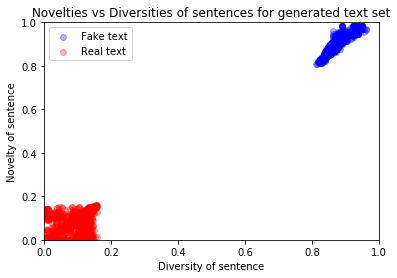

In [13]:
get_scatter_plot(fake_diversities, fake_novelties, \
                 real_diversities, real_novelties)

In [12]:
# get_scatter_plot(lev_normed_fake_diversities, lev_normed_fake_novelties, \
#                  lev_normed_real_diversities, lev_normed_real_novelties)

## Real text: Distribution of novelties and diversities

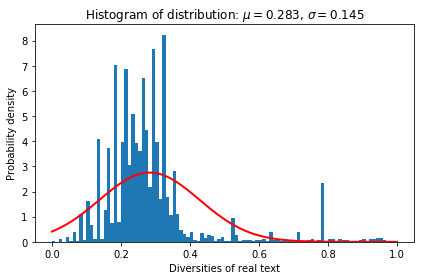

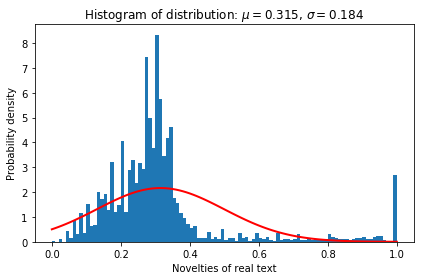

In [10]:
normal_distribution(lev_normed_real_diversities, 'Diversities of real text')
normal_distribution(lev_normed_real_novelties, 'Novelties of real text')

## Fake text: Distribution of novelties and diversities


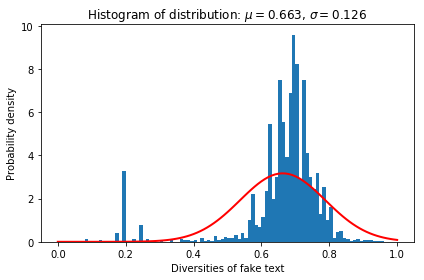

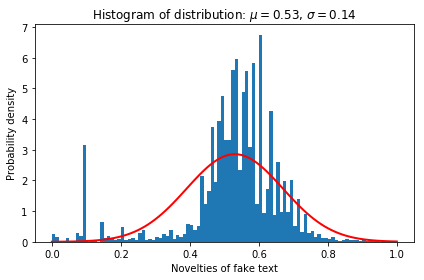

In [11]:
normal_distribution(lev_normed_fake_diversities, 'Diversities of fake text')
normal_distribution(lev_normed_fake_novelties, 'Novelties of fake text')